<a href="https://colab.research.google.com/github/Aditi-Gandhi/Netflix_data_analysis_visualisation/blob/Netflix_BusinessCase/NetflixData_PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   1.Defining Problem Statement and Analysing basic metrics


Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('NetflixData_PythonProject.csv')
data_original = data.copy()
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


- The given dataset contains 8807 line of datarows (titles) with 12 columns (descriptions)
-There are also NaN values in some columns
- We also observe there are cells with multiple comma separated values. This is taken care by unnesting such values into different rows.

In [ ]:
#Unnesting the rows - Director, Cast, Country
#The new DataFrame is 'df_explode'

data1 = data.copy()
data1['director'] = data1['director'].str.split(',')
df_explode1 = data1.explode('director')
df_explode1['cast'] = df_explode1['cast'].str.split(',')
df_explode2 = df_explode1.explode('cast')
df_explode2['country'] = df_explode2['country'].str.split(', ')
df_explode3 = df_explode2.explode('country')
df_explode3['listed_in'] = df_explode3['listed_in'].str.split(', ')
df_explode = df_explode3.explode('listed_in')
df_explode.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [ ]:
data_copy = df_explode.copy()

# 2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
#To get the dimension of data
data.ndim


2

In [ ]:
#To get the shape of old Datafarme - 'data'
data.shape

(8807, 12)

In [ ]:
#To get the shape of new Datafarme - 'df_explode'
df_explode.shape

(201991, 12)

In [ ]:
#To get the total number of elements of old Dataframe
data.size

105684

In [ ]:
#To get the total number of elements of new Dataframe
df_explode.size

2423892

In [ ]:
#To get all the attributes
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#To get information of Dataframe like the column data type, non-ull values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Copying the unnested Dafaframe to original dataframe - 'data'

In [ ]:
data = df_explode.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


- Missing Value Detection.
 Data profiling and Cleaning

--- We need to identify the incorrect, incomplete, irrevlevant and missing piece of data and then modify, replace , delete it as needed.



In [ ]:
print(data.isnull())

      show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
1       False  False  False      True  False    False       False   
1       False  False  False      True  False    False       False   
1       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8806    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      Fal

In [ ]:
print(data.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


- With above observation we can say columns like 'director','cast','date_added', 'country', 'rating' and 'duration' have null values.

In [ ]:
data.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [ ]:
data.isnull().sum().sum()

64914

- Looking at above data we can say there are total 4307 missing values in Dataframe.There are 2634 missing points under 'director similarly 825,831,10,4,3 missing points in 'cast','country','date_added','rating','duration' respectively.

In [ ]:
data.director.fillna('unknown_director', inplace=True)
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
data.cast.fillna('unknown_cast', inplace=True)
data.country.fillna('unknown_country', inplace=True)
data.date_added.fillna('unknown_date_added', inplace=True)
data.rating.fillna('0', inplace=True)
data.duration.fillna('0', inplace=True)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

- Statistical Summary after cleaning data

In [ ]:
data.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      201991 non-null  object
 4   cast          201991 non-null  object
 5   country       201991 non-null  object
 6   date_added    201991 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201991 non-null  object
 9   duration      201991 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


# 3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
pd.DataFrame(data['title'].value_counts())

,title
Kahlil Gibran's The Prophet,700
Holidays,504
Movie 43,468
The Eddy,416
Narcos,378
...,...
Thackeray,1
The 2000s,1
Miniforce: Super Dino Power,1
Dancing with the Birds,1


In [ ]:
data['director'].value_counts()

unknown_director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Gautier & Leduc            1
Robb Dipple                1
Glenn Weiss                1
Lyric R. Cabral            1
Kirsten Johnson            1
Name: director, Length: 5121, dtype: int64

In [ ]:
data['cast'].value_counts()

unknown_cast         2146
 Alfred Molina        160
 Salma Hayek          130
 Frank Langella       128
 John Rhys-Davies     125
                     ... 
 Anton Peeples          1
Nesta Cooper            1
 Alicia Sanz            1
 Jake Borelli           1
Ricki Stern             1
Name: cast, Length: 39297, dtype: int64

In [ ]:
data['title'].value_counts()

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Thackeray                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8807, dtype: int64

In [ ]:
data['country'].value_counts()

United States      59349
India              22814
United Kingdom     12945
unknown_country    11897
Japan               8679
                   ...  
Palestine              2
Kazakhstan             1
Nicaragua              1
United States,         1
Uganda                 1
Name: country, Length: 128, dtype: int64

In [ ]:
data['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [ ]:
data['title'].nunique()

8807

In [ ]:
data['director'].unique()

array(['Kirsten Johnson', 'unknown_director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data['director'].nunique()

5121

 - Above methods- 'value_counts()' gives the total number odf entries for specified column. 'unique()' and 'nunique()' methods gives all the uniques values and its counts respectuvely for specifies column.

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

**- 4.1 [A] : For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

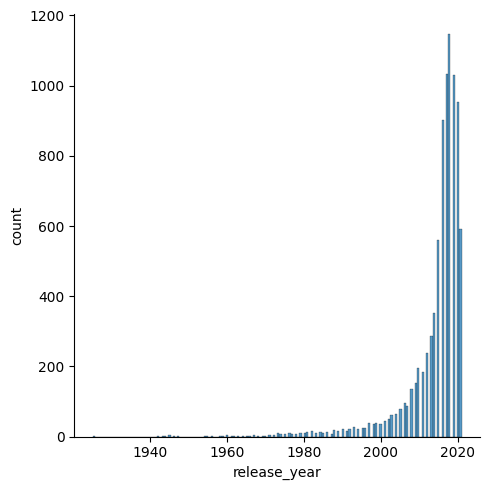

In [ ]:
#displot graph for release_year

df = data[['release_year','title']].drop_duplicates(keep='first')
sns.displot(data = df, x = 'release_year')
plt.ylabel('count')
plt.show()

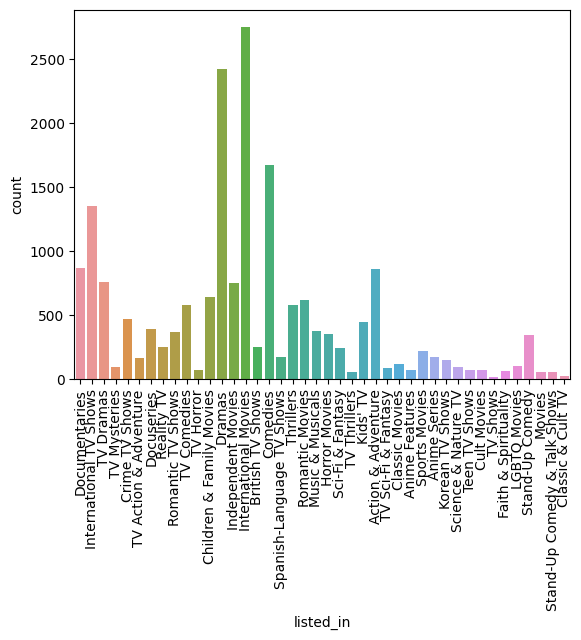

In [ ]:
#countplot graph for 'listed_in'

df = data[['listed_in','title']].drop_duplicates(keep='first')
sns.countplot(data = df, x = 'listed_in')
plt.xticks(rotation=90)
plt.show()


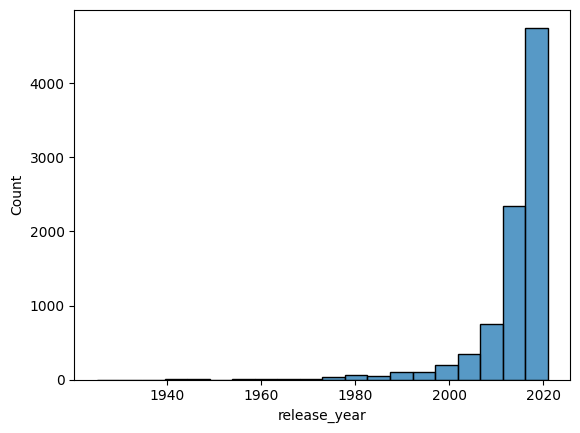

In [ ]:
#histogram for 'release_year'

df = data[['release_year','title']].drop_duplicates(keep='first')
sns.histplot(data = df, x = 'release_year', bins = 20)
plt.show()

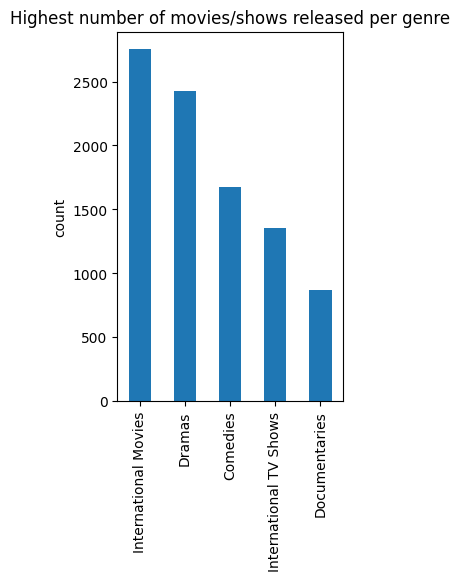

In [ ]:
# after removing the dupliactes and considering only Unique values

plt.subplot(1,2,2)
data[['show_id','listed_in']].drop_duplicates(keep='first')['listed_in'].value_counts().head().plot(kind = 'bar')
plt.title('Highest number of movies/shows released per genre')
plt.ylabel('count')
plt.show()

**- 4.2 For categorical variable(s): Boxplot**

<ipython-input-111-4f90b7348d39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)


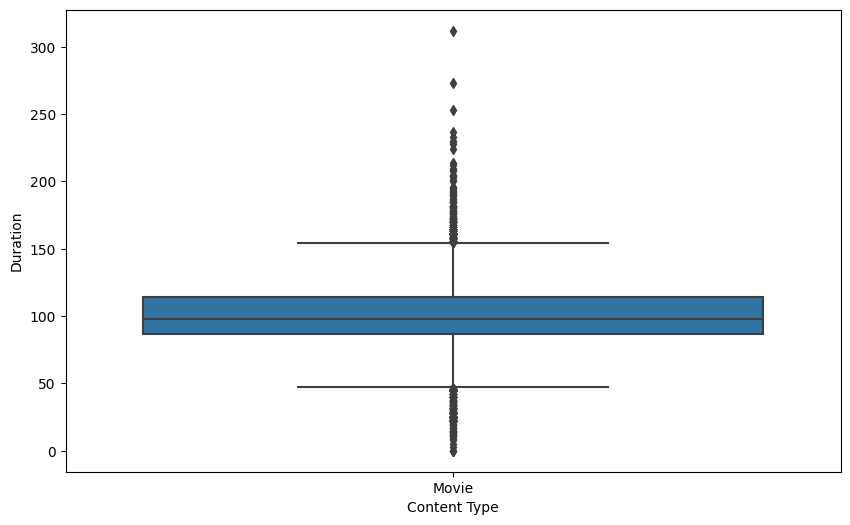

In [ ]:
# Duration distribution for 'Movie' category

df_movies = data[data.type.str.contains("Movie")]
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)
df_movies_new = df_movies[['type','title','duration']].drop_duplicates(keep='first')
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_movies_new, x = 'type', y = 'duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

<ipython-input-112-2ea34cbb2d7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['duration'] = df_show['duration'].str.extract('(\d+)',expand=False).astype(int)


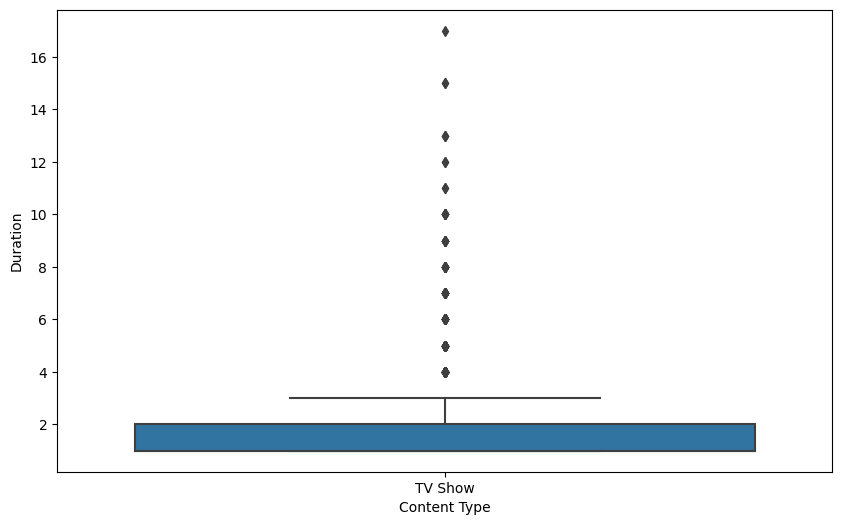

In [ ]:
# Duration distribution for 'TV Show' category

df_show = data[data.type.str.contains("TV Show")]
df_show['duration'] = df_show['duration'].str.extract('(\d+)',expand=False).astype(int)
df_show_new = df_show[['type','title','duration']].drop_duplicates(keep='first')
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_show_new, x = 'type', y = 'duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

- We have created a boxplot for both the categories - 'movie' and 'TV Show' against 'duration'. Analysing the duration distribution for content type allows us to understand what kind of content was released.
- Analyzing the above trend we can say Netflix has Movies having duartion between 80-120 minutes with few outliers exceedingly approximately 2.5 hours.
- similarly wide range of TV Shows were released with 0-3 seasons. We can say Netflix focused on shorter TV Show formats



**- 4.3 For correlation: Heatmaps, Pairplots**

In [ ]:
df_movies = data[data.type.str.contains("Movie")]
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)
df_shows = data[data.type.str.contains("TV Show")]
df_shows['duration'] = df_shows['duration'].str.extract('(\d+)',expand=False).astype(int)

<ipython-input-113-936287ed9c69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)
<ipython-input-113-936287ed9c69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration'] = df_shows['duration'].str.extract('(\d+)',expand=False).astype(int)


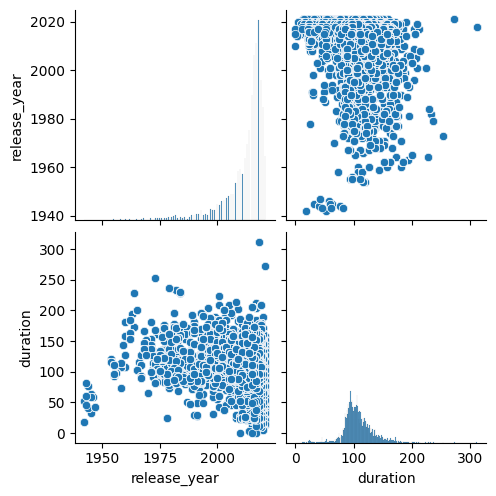

In [ ]:
sns.pairplot(data = df_movies)
plt.show()

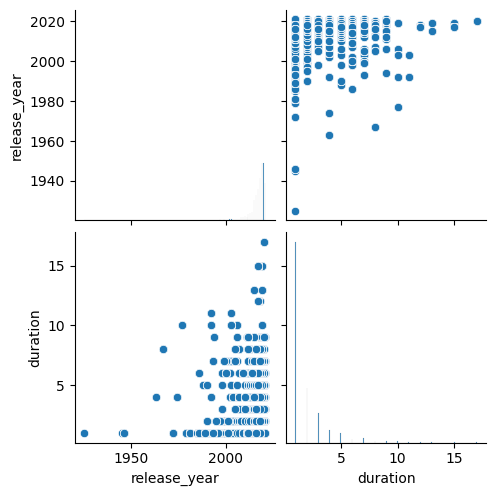

In [ ]:
sns.pairplot(data = df_shows)

plt.show()

<ipython-input-116-b4238abf2bc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_movies.corr(), annot = True)


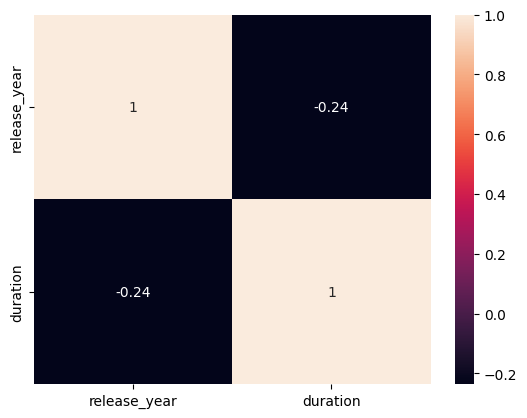

In [ ]:
sns.heatmap(df_movies.corr(), annot = True)
plt.show()

# 5. Missing Value & Outlier check (Treatment optional)

- In a dataset, missing values are referred to empty cells, rows, and columns.They make dataset unable to work on as its inconsistent data. So its important to detect these missing values and treat them. 'isnull()' function is widely used for this.

In [ ]:
#data_copy is the copy of unnested dataframe 'df_explode'

data_copy.isnull().values.any()

True

In [ ]:
data_copy.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
data_copy.isnull().sum().sum()

64914

In [ ]:
data_copy.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

- We above methods we observe that there are total 4307 missing values in 6 different columns - 'director','cast','country','rating' and 'duration'. We can handle this using 'fillna' method from pandas.


In [ ]:
# Treatment
data_copy.director.fillna('unknown_director', inplace=True)
data_copy.cast.fillna('unknown_cast', inplace=True)
data_copy.country.fillna('unknown_country', inplace=True)
data_copy.date_added.fillna('unknown_date_added', inplace=True)
data_copy.rating.fillna('0', inplace=True)
data_copy.duration.fillna('0', inplace=True)
data_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- Now the data is clean as it has 0 rows with null values. This data can now be used for analysis.

# Outliers

<ipython-input-123-32111604bf0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)


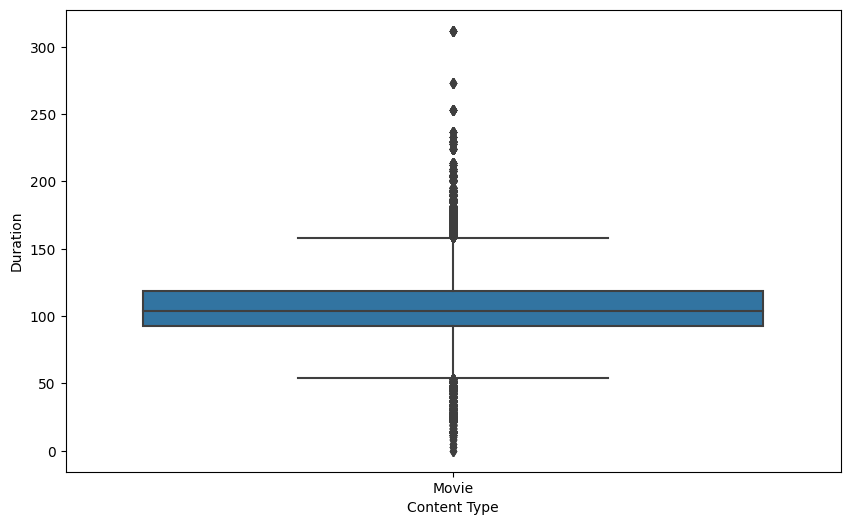

In [ ]:
#segregating the data based on type - Movies and TV Shows


df_movies = data[data.type.str.contains("Movie")]
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_movies, x = 'type', y = 'duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

<ipython-input-124-f72285bcad15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['duration'] = df_show['duration'].str.extract('(\d+)',expand=False).astype(int)


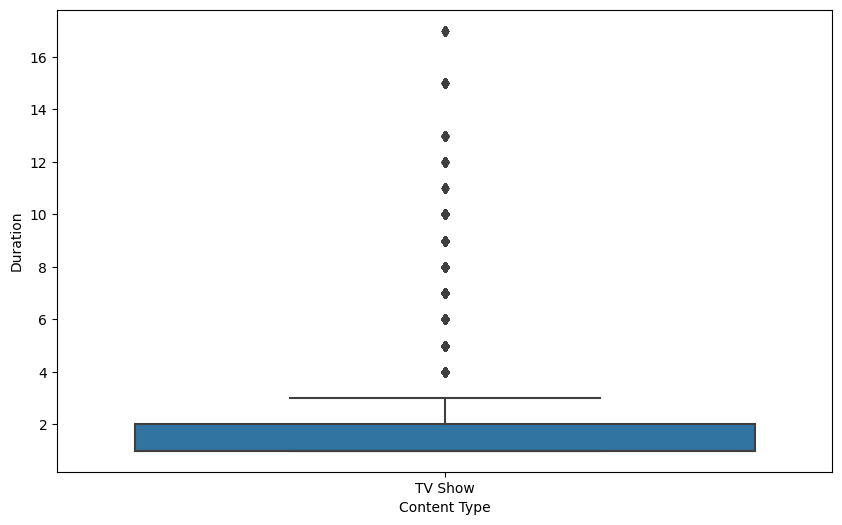

In [ ]:
# Duration distribution for 'Movie' category

df_show = data[data.type.str.contains("TV Show")]
df_show['duration'] = df_show['duration'].str.extract('(\d+)',expand=False).astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_show, x = 'type', y = 'duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

- Looking at the above  movie box plot, we can see that most movies fall within a reasonable duration range, with few outliers exceedingly approximately 2.5 hours. This suggests mosyt of  movies on Netflix have standard viewing time.
- For TV shows, the box plot reveals that most shows have one to four seasons, with very few outliers having longer durations. This aligns with the earlier trends, indicating that Netflix focuses on shorter series formats.

# 6. Insights based on Non-Graphical and Visual Analysis

###- 6.1 Comments on the range of attributes

In [ ]:
data_original.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data_original.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

- using above we can say the original dataset has 8807 rows and 10 columns. 'release_year' is the numeric variable having mean 2014.18
- the oldest movie available on Netflix was released in 2014 and the most latest movie available was released in 2014
- 25% of movies were released before 25, similarly 50% and 75% movies were released before 2017 and 2019 respectively

###- 6.2 Comments on the distribution of the variables and relationship between them

In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data_original.corr()

<ipython-input-128-13525ac5de26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_original.corr()


,release_year
release_year,1.0


- the original datset has 12 variables having datatypes as int64(1) and  object(11)
- we can see there are 6 variables that have null values
- also the corelation can be found only on 'release_year' variable as it is the only numeric variable in original dataset

###- 6.3 Comments for each univariate and bivariate plot

- https://colab.research.google.com/drive/17Sjs4fIKgy5Z1rPT0at2rBLBHLdeqgPM#scrollTo=74ZXfROK6DWl&line=3&uniqifier=1

from the above displot graph it is known that most of the movies/tv shows available on the netflix were released between 2015 - 2020 (the peak rises gradually after 2010) which means Netflix is inclined towards streaming new releases

- https://colab.research.google.com/drive/17Sjs4fIKgy5Z1rPT0at2rBLBHLdeqgPM#scrollTo=igR0Z6ONeCgj&line=1&uniqifier=1

from the above countplot graph we can say the most popular genres are 'International movies' and 'Dramas'.
The least viewed genres belong to 'TV Shows' and 'Classic and Cult TV'

- https://colab.research.google.com/drive/17Sjs4fIKgy5Z1rPT0at2rBLBHLdeqgPM#scrollTo=y4t-rruBRx8U&line=9&uniqifier=1

from the above boxplot graph we can infer that - t most movies fall within a reasonable duration range, with few outliers exceedingly approximately 2.5 hours. This suggests most of  movies on Netflix have standard viewing time.


# 7. Business Insights -

In [ ]:
data.type.str.contains('TV Show').sum()

56148

In [ ]:
data.type.str.contains('Movie').sum()

145843

- **1. Insight** : Analysis say that Netflix added more number of Movie than TV Shows. Indicating Netflix follows trend where Movies dominate over TV Shows.

In [ ]:
data.groupby('cast').nunique()['title'].sort_values(ascending = False).head(10)

cast
unknown_cast         825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
 Om Puri              27
 Rajesh Kava          26
Shah Rukh Khan        26
 Andrea Libman        25
 Boman Irani          25
Name: title, dtype: int64

- **2. Insight** :The above analysis show top 10 *actors* who have appeared in most movies or TV shows

In [ ]:
director_count = data.groupby('director').nunique()['title'].sort_values(ascending = False).head(10)
director_count

director
unknown_director       2634
Rajiv Chilaka            22
 Jan Suter               18
Raúl Campos              18
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Martin Scorsese          12
Name: title, dtype: int64

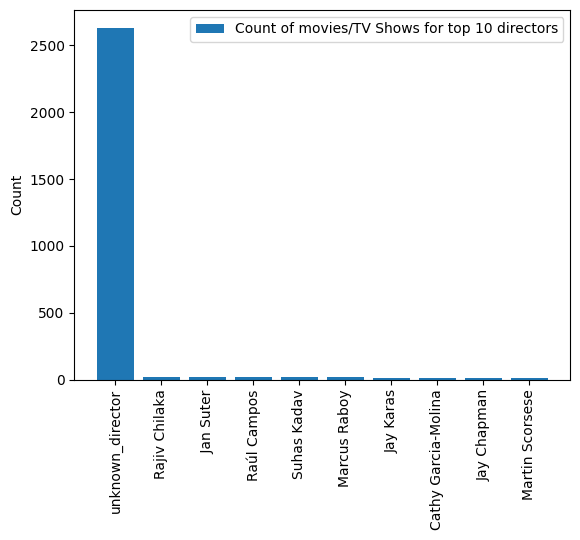

In [ ]:
plt.bar(director_count.index, director_count,label = 'Count of movies/TV Shows for top 10 directors' )
plt.xticks(rotation = 90)
plt.legend()
plt.ylabel("Count")
plt.show()

- **3. Insight** : The above analysis show the top 10 directors who have appeared in most movies or TV shows

In [ ]:
data.groupby('listed_in').nunique()['title'].sort_values(ascending = False).head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: title, dtype: int64

- **4. Insight** : The above analysis show the genre summary to know which kind
of genre is available in Netflix. This shows that most of the Netflix audience likes to watch inetrnaltional movies followed by Drama.






- **5. Insight** :TV Show Episodes: Most TV shows on Netflix have one/two season, suggesting a preference for shorter series among viewers.

# 8. Recommendations  - Actionable items for business

- 1. Along with Actors popularty,by approaching the top director netflix can plan some more movies/tv shows in order to increase the popularity


- 2. Netflix can add more content that falls in genre - 'TV Shows' , 'Classic &cult TV'

In [ ]:
data.groupby('listed_in').nunique()['title'].sort_values().head(10)

listed_in
TV Shows                        16
Classic & Cult TV               28
Stand-Up Comedy & Talk Shows    56
TV Thrillers                    57
Movies                          57
Faith & Spirituality            65
Teen TV Shows                   69
Cult Movies                     71
Anime Features                  71
TV Horror                       75
Name: title, dtype: int64

- 3. Netflix should focus on releasing the movies/tv shows during weekends, festivals, holidays.

- 4. We have seen most number of international movies genre so Netflix needs to give priority to other geners like hooro,comedy..etc

In [ ]:
data.date_added.value_counts()

January 1, 2020       3730
November 1, 2019      2229
July 1, 2021          2219
October 1, 2017       1899
September 1, 2021     1756
                      ... 
September 19, 2017       1
August 8, 2017           1
October 10, 2017         1
February 4, 2008         1
September 25, 2021       1
Name: date_added, Length: 1768, dtype: int64

- 5. We see there is growing trend in number of movies/tv shows getting added to Netflix. So  Netflix should continue this trend .